PART 2.1

In [1]:
'''>>>>> start CodeP3.2.1F24
    V.P. Carey ME249, Fall 2024 

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import math
import pandas as pd
from copy import deepcopy
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
import matplotlib.pyplot as plt
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#Part 1 input data: Mode number, Air temp (degC), ID (W/sqm), load resistance (ohms)
xdata = [[0., 10.0, 200.0, 24.3],
        [1., 10.0, 200.0, 24.3],
        [2., 10.0, 200.0, 24.3],
        [1., 10.0, 200.0, 24.3],
        [0., 10.0, 200.0, 24.3], 
        [1., 10.0, 200.0, 24.3], 
        [2., 10.0, 200.0, 24.3], 
        [0., 10.0, 200.0, 51.8], 
        [1., 10.0, 200.0, 51.8],
                
        [2., 10.0, 200.0, 51.8], 
        [0., 10.0, 200.0, 96.2], 
        [1., 10.0, 200.0, 96.2], 
        [2., 10.0, 200.0, 96.1], 
        [0., 10.0, 200.0, 170.1],
                
        [1., 10.0, 200.0, 170.1], 
        [2., 10.0, 200.0, 170.1], 
        [0., 10.0, 500.0, 7.0], 
        [1., 10.0, 500.0, 7.0], 
        [2., 10.0, 500.0, 7.0], 
                
        [0., 10.0, 500.0, 21.2], 
        [1., 10.0, 500.0, 21.2], 
        [2., 10.0, 500.0, 21.2], 
        [0., 10.0, 500.0, 43.2], 
        [1., 10.0, 500.0, 43.2], 
                
        [1., 10.0, 700.0, 4.9], 
        [2., 10.0, 700.0, 4.9], 
        [0., 10.0, 700.0, 14.3], 
        [1., 10.0, 700.0, 14.3], 
        [2., 10.0, 700.0, 14.3],
                
        [2., 10.0, 500.0, 43.2], 
        [0., 10.0, 500.0, 79.1], 
        [1., 10.0, 500.0, 79.1], 
        [2., 10.0, 500.0, 79.1], 
        [0., 10.0, 700.0, 4.8], 
                
        [0., 10.0, 700.0, 29.7], 
        [1., 10.0, 700.0, 29.7], 
        [2., 10.0, 700.0, 29.7], 
        [0., 10.0, 700.0, 55.3], 
        [1., 10.0, 700.0, 55.3], 
        [2., 10.0, 700.0, 55.3], 
                
        [0., 10.0, 1000.0, 3.92], 
        [1., 10.0, 1000.0, 3.92], 
        [2., 10.0, 1000.0, 3.92], 
        [0., 10.0, 1000.0, 11.7], 
        [1., 10.0, 1000.0, 11.7], 
                
        [2., 10.0, 1000.0, 11.7], 
        [0., 10.0, 1000.0, 25.2], 
        [1., 10.0, 1000.0, 25.2], 
        [2., 10.0, 1000.0, 25.2], 
        [0., 10.0, 1000.0, 41.6], 
        [1., 10.0, 1000.0, 41.6], 
        [2., 10.0, 1000.0, 41.6]]

xarray= np.array(xdata)
# print (xdata)
# print (xarray)

# define meadian values of input variables - add your values here
Tamed = np.median(xarray[:,1])  #make sure Tamed does not = 0
IDmed = np.median(xarray[:,2])
RLmed = np.median(xarray[:,3])
print(f"Tamed = {Tamed}, IDmed = {IDmed}, RLmed = {RLmed}")

if Tamed==0:
    raise ValueError(f'Tamed == {Tamed}')

#Part 1 output data: VL (V) and Power out Wd (W)
ydata = [[46.0, 87.3],
         [27.9, 64.2],
         [27.9, 32.1],
         [46.0, 40.9],
         [46.0, 87.3], 
         [27.9, 64.2], 
         [27.9, 32.1], 
         [46.0, 40.9], 
         [92.1, 163.9], 
         [59.5, 68.5], 
         [46.0, 22.0], 
         [92.1, 88.2], 
         [110.6, 127.2], 
         [46.0, 12.4], 
         [92.1, 49.9], 
         [184.2, 199.6], 
         [48.4, 335.3], 
         [20.8, 124.3], 
         [20.8, 62.1], 
         [48.4, 110.7], 
         [96.8, 442.9], 
         [63.1, 188.2], 
         [48.4, 54.3], 
         [96.9, 217.3], 
         [128.7, 383.6], 
         [48.4, 29.6], 
         [96.8, 118.7], 
         [193.7, 474.8], 
         [49.3, 496.1], 
         [20.4, 171.2], 
         [20.4, 85.6], 
         [49.3, 169.9], 
         [98.6, 679.9], 
         [59.7, 249.8], 
         [49.3, 81.8], 
         [98.6, 327.4], 
         [124.1, 518.9], 
         [49.305, 43.9], 
         [98.6, 175.8], 
         [197.2, 703.3], 
         [50.8, 658.9], 
         [23.1, 272.9], 
         [23.1, 136.4], 
         [50.8, 220.7], 
         [101.6, 883.1], 
         [69.0, 407.2], 
         [50.8, 102.5], 
         [101.6, 410.0], 
         [148.6, 877.2], 
         [50.8, 62.0], 
         [101.6, 248.3], 
         [203.2, 993.5]]

yarray= np.array(ydata)
# print (ydata)
# print (yarray)

# define meadian values of output variables - add your values here
VLmed = np.median(yarray[:,0])
Wdmed = np.median(yarray[:,1])
print(f"VLmed = {VLmed}, Wdmed = {Wdmed}")

Tamed = 10.0, IDmed = 500.0, RLmed = 25.2
VLmed = 50.8, Wdmed = 150.15


In [2]:
### normalize the dataset
xnorm = deepcopy(xarray)
xnorm[:,1] = xarray[:,1] / Tamed
xnorm[:,2] = xarray[:,2] / IDmed
xnorm[:,3] = xarray[:,3] / RLmed
# print(xnorm)

ynorm = deepcopy(yarray)
ynorm[:,0] = yarray[:,0] / VLmed
ynorm[:,1] = yarray[:,1] / Wdmed
# print(ynorm)

In [3]:
### separate normalized sets into train/(test or validation) 66:33
xtrain, xtest, ytrain, ytest = train_test_split(xnorm, ynorm, test_size=0.33, random_state=1) # change random seed if you want

# sanity check
# print(len(xtrain), len(ytrain))
# print(len(xtest), len(ytest))

In [279]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 4 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(18, activation=K.elu, input_shape=[4], kernel_initializer=initializer),
    keras.layers.Dense(28, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(14, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2, kernel_initializer=initializer)
  ])


/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [280]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.020)
model.compile(loss='MAE',optimizer=rms)
model.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 18)                90        
                                                                 
 dense_116 (Dense)           (None, 32)                608       
                                                                 
 dense_117 (Dense)           (None, 16)                528       
                                                                 
 dense_118 (Dense)           (None, 8)                 136       
                                                                 
 dense_119 (Dense)           (None, 2)                 18        
                                                                 
Total params: 1,380
Trainable params: 1,380
Non-trainable params: 0
_________________________________________________________________


In [284]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 1000, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                                    mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xnorm,ynorm,epochs=8000,callbacks=[es])
# historyData = model.fit(xnorm,ynorm,epochs=8000,callbacks=[es],validation_split=0.2)

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model_1')

Epoch 1/8000
2/2 [==============================] - 0s 3ms/step - loss: 0.1490
Epoch 2/8000
2/2 [==============================] - 0s 2ms/step - loss: 0.0935
Epoch 3/8000
2/2 [==============================] - 0s 2ms/step - loss: 0.1248
Epoch 4/8000
2/2 [==============================] - 0s 1ms/step - loss: 0.1247
Epoch 5/8000
2/2 [==============================] - 0s 1ms/step - loss: 0.1459
Epoch 6/8000
2/2 [==============================] - 0s 1ms/step - loss: 0.1417
Epoch 7/8000
2/2 [==============================] - 0s 2ms/step - loss: 0.1168
Epoch 8/8000
2/2 [==============================] - 0s 1ms/step - loss: 0.1116
Epoch 9/8000
2/2 [==============================] - 0s 2ms/step - loss: 0.1157
Epoch 10/8000
2/2 [==============================] - 0s 1ms/step - loss: 0.1199
Epoch 11/8000
2/2 [==============================] - 0s 1ms/step - loss: 0.1244
Epoch 12/8000
2/2 [==============================] - 0s 1ms/step - loss: 0.1049
Epoch 13/8000
2/2 [==============================

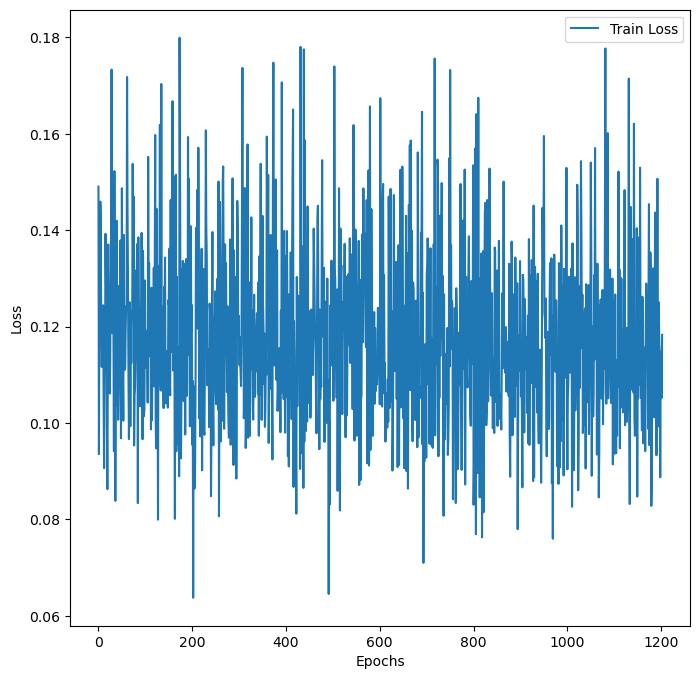

In [285]:
# plot loss history for visualization
plt.plot(historyData.history['loss'], label='Train Loss')
# plt.plot(historyData.history['val_loss'], label='Validation Loss')
# plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [286]:
# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model_1")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.


/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [287]:
predictions = recon_model.predict(xtrain)
predictions_val = recon_model.predict(xtest)

pv, pw = [], []
rv, rw = [], []

pv_val, pw_val = [], []
rv_val, rw_val = [], []

abs_err = 0
for pred, real in zip(predictions, ytrain):
    pred_v, pred_w = pred
    real_v, real_w = real
    abs_err += abs(real_w - pred_w)
    pv.append(pred_v)
    pw.append(pred_w)
    rv.append(real_v)
    rw.append(real_w)

abs_err_val = 0
for pred, real in zip(predictions_val, ytest):
    pred_v, pred_w = pred
    real_v, real_w = real
    abs_err_val += abs(real_w - pred_w)
    pv_val.append(pred_v)
    pw_val.append(pred_w)
    rv_val.append(real_v)
    rw_val.append(real_w)

mean_abs_err = abs_err/len(pw)
mean_abs_err_val = abs_err_val/len(pw_val)
print("mean absolute error (training): ", mean_abs_err)
print("mean absolute error (validation): ", mean_abs_err_val)

1/1 [==============================] - 0s 11ms/step
mean absolute error (training):  0.09139341362246413
mean absolute error (validation):  0.15628321028472042


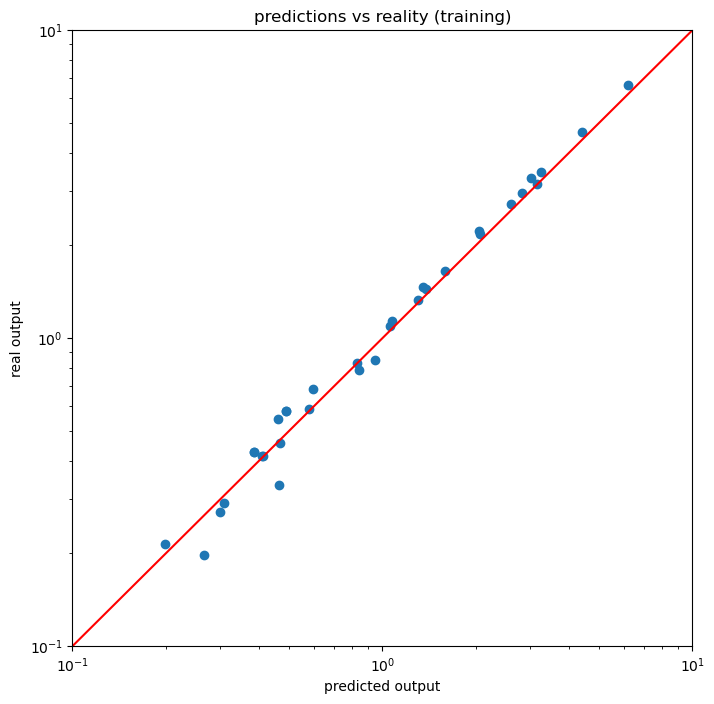

In [288]:
# training
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas

plt.scatter(pw, rw)
# plt.scatter(pv, rv)
plt.title('predictions vs reality (training)')
plt.xlabel('predicted output') 
plt.ylabel('real output')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()

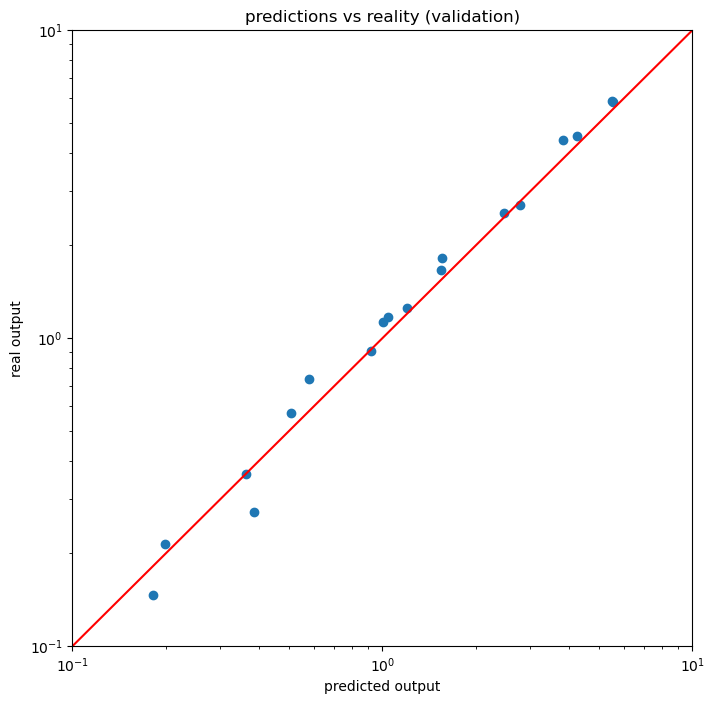

In [289]:
# validation
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas

plt.scatter(pw_val, rw_val)
# plt.scatter(pv, rv)
plt.title('predictions vs reality (validation)')
plt.xlabel('predicted output') 
plt.ylabel('real output')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()

PART 2.2

In [167]:
'''>>>>> proto CodeP3.2.2F24
    V.P. Carey ME249, Fall 2024

Intro to Neural Network Modeling 
Keras model for PV panel electrical power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
# median values of input variables - DETERMINE APPROPRIATE MEDIAN VALUES AND REPLACE THESE
# find using numpy below data entry
Tamed = 1.0
IDmed = 1.0
RLmed = 1.0
#Part 2 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
xdata = []
xdata = [[10.0/Tamed, 200.0/IDmed, 24.3/RLmed], 
 [10.0/Tamed, 200.0/IDmed, 51.8/RLmed], 
 [10.0/Tamed, 200.0/IDmed, 96.2/RLmed],
 [10.0/Tamed, 200.0/IDmed, 133.2/RLmed],
 [10.0/Tamed, 200.0/IDmed, 170.1/RLmed], 
 [10.0/Tamed, 500.0/IDmed, 7.0/RLmed], 
 [10.0/Tamed, 500.0/IDmed, 21.2/RLmed], 
 [10.0/Tamed, 500.0/IDmed, 43.2/RLmed], 
 [10.0/Tamed, 500.0/IDmed, 61.2/RLmed],
 [10.0/Tamed, 500.0/IDmed, 79.1/RLmed], 
 [10.0/Tamed, 1000.0/IDmed, 3.92/RLmed], 
 [10.0/Tamed, 1000.0/IDmed, 11.7/RLmed], 
 [10.0/Tamed, 1000.0/IDmed, 25.2/RLmed],
 [10.0/Tamed, 1000.0/IDmed, 33.4/RLmed],
 [10.0/Tamed, 1000.0/IDmed, 41.6/RLmed],
 [10.0/Tamed, 700.0/IDmed, 4.9/RLmed], 
 [10.0/Tamed, 700.0/IDmed, 14.3/RLmed], 
 [10.0/Tamed, 700.0/IDmed, 29.7/RLmed],
 [10.0/Tamed, 700.0/IDmed, 42.9/RLmed],
 [10.0/Tamed, 700.0/IDmed, 55.3/RLmed], 
 [18.1/Tamed, 500.0/IDmed, 7.0/RLmed], 
 [18.5/Tamed, 500.0/IDmed, 21.2/RLmed], 
 [19.0/Tamed, 500.0/IDmed, 43.2/RLmed], 
 [18.6/Tamed, 500.0/IDmed, 61.2/RLmed],
 [18.8/Tamed, 500.0/IDmed, 79.1/RLmed], 
 [2.1/Tamed, 1000.0/IDmed, 3.92/RLmed], 
 [2.0/Tamed, 1000.0/IDmed, 11.7/RLmed], 
 [1.9/Tamed, 1000.0/IDmed, 25.2/RLmed],
 [2.3/Tamed, 1000.0/IDmed, 33.4/RLmed],
 [2.4/Tamed, 1000.0/IDmed, 41.6/RLmed],
 [0.5/Tamed, 700.0/IDmed, 4.9/RLmed], 
 [0.7/Tamed, 700.0/IDmed, 14.3/RLmed], 
 [1.0/Tamed, 700.0/IDmed, 29.7/RLmed],
 [0.8/Tamed, 700.0/IDmed, 42.9/RLmed],
 [0.2/Tamed, 700.0/IDmed, 55.3/RLmed], 
 [15.2/Tamed, 200.0/IDmed, 24.3/RLmed], 
 [15.4/Tamed, 200.0/IDmed, 51.8/RLmed], 
 [21.2/Tamed, 1000.0/IDmed, 3.92/RLmed], 
 [19.4/Tamed, 1000.0/IDmed, 11.7/RLmed], 
 [19.2/Tamed, 1000.0/IDmed, 25.2/RLmed]]

xarray= np.array(xdata)

# get medians
Tamed = np.median(xarray[:,0])  #make sure Tamed does not = 0
IDmed = np.median(xarray[:,1])
RLmed = np.median(xarray[:,2])

if Tamed==0:
    raise ValueError(f'Tamed == {Tamed}')

print(f"Tamed = {Tamed}, IDmed = {IDmed}, RLmed = {RLmed}")

xarray[:,0] = xarray[:,0] / Tamed
xarray[:,1] = xarray[:,1] / IDmed
xarray[:,2] = xarray[:,2] / RLmed

# print (xdata)
# print (xarray)

# values of output variable

#Part 2 output data: mode resulting in maximum power output Mmax
ydata = []
ydata = [[0.], 
 [1.], 
 [2.], 
 [2.], 
 [2.],     
 [0.], 
 [1.], 
 [2.],
 [2.],
 [2.],      
 [0.], 
 [1.], 
 [2.], 
 [2.],
 [2.],      
 [0.], 
 [1.], 
 [2.], 
 [2.],
 [2.],        
 [0.], 
 [1.], 
 [2.],
 [2.],
 [2.],       
 [0.], 
 [1.], 
 [2.], 
 [2.],
 [2.],       
 [0.], 
 [1.], 
 [2.], 
 [2.],
 [2.],      
 [0.], 
 [1.], 
 [0.], 
 [1.], 
 [2.] ]
yarray= np.array(ydata)
# print (ydata)
# print (yarray)

# Change the labels above from categorical to one-hot encoding
ydataCatOHE = []
#classes = [0 1 2]

for i in yarray:
    if i[0] == 0:
        ydataCatOHE.append([1, 0, 0])
    elif i[0] == 1:
        ydataCatOHE.append([0, 1, 0])
    elif i[0] == 2:
        ydataCatOHE.append([0, 0, 1])
    else:
        raise IndexError(f"y value = {i}")

ydataCatOHEarray= np.array(ydataCatOHE)

# print('ydataCatOHE = ', ydataCatOHE)
# print('ydataCatOHEarray = ', ydataCatOHEarray)

#  ADD CODE TO PARTITION THE DATA HERE - MANUALLY OR WITH THE CODE IN THE PROJECT DESCRIPTION:
# make sure scikit-learn (vers 1.0.2 or later) is installed
# in your python 3.7 environment
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(xarray, ydataCatOHEarray, test_size=0.25, random_state=13)

# print to check the shape of training and validation set
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

# you can add these lines of code at the end to see how the labels are 
# divided between the sets:
print('training OHE labels:')
print(train_label)
print('validation OHE labels:')
print(valid_label)

num_classes = 3

Tamed = 10.0, IDmed = 700.0, RLmed = 29.7
(30, 3) (10, 3) (30, 3) (10, 3)
training OHE labels:
[[1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]]
validation OHE labels:
[[1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [239]:
# define neural network model
#In the first layer, the input shape is provided, which is 3 in our case. 
#As seen below, we have included three dense layers. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(12, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(24, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer), 
    keras.layers.Dropout(0.35),
    keras.layers.Dense(num_classes, activation='softmax')
  ])
#ADD OUTPUT LAYER, REMOVE DROPOUTS FOR FIRST PART, ADD LATER

/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [240]:

#COMPLIE THE MODEL
'''After the model is created, you compile it using the Adam optimizer, one of the
most popular optimization algorithms. 

Additionally, you specify the loss type which is categorical cross entropy which
is used for multi-class classification.  Lastly, you specify the metrics as accuracy which you want to
analyze while the model is training.'''
#COMPLETE THE model.compile STATEMENT BELOW
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


#SUMMARIZE MODEL
'''To visualize the layers that created in the above step, use the summary function.
This will show some parameters (weights and biases) in each layer and also the total parameters in your model.''' 
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 12)                48        
                                                                 
 dense_82 (Dense)            (None, 24)                312       
                                                                 
 dropout_36 (Dropout)        (None, 24)                0         
                                                                 
 dense_83 (Dense)            (None, 8)                 200       
                                                                 
 dropout_37 (Dropout)        (None, 8)                 0         
                                                                 
 dense_84 (Dense)            (None, 3)                 27        
                                                                 
Total params: 587
Trainable params: 587
Non-trainable

In [242]:
#TRAIN THE MODEL

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 2000, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

#COMPLETE THE model.fit STATEMENT BELOW
model_train = model.fit(train_X, train_label, epochs=2000, verbose=1, validation_data=(valid_X, valid_label))

loss_hist = model_train.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(model_train.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model_2_2')

Epoch 1/1800
1/1 [==============================] - 0s 31ms/step - loss: 0.4168 - accuracy: 0.7333 - val_loss: 0.4414 - val_accuracy: 0.7000
Epoch 2/1800
1/1 [==============================] - 0s 17ms/step - loss: 0.3611 - accuracy: 0.8000 - val_loss: 0.4424 - val_accuracy: 0.7000
Epoch 3/1800
1/1 [==============================] - 0s 17ms/step - loss: 0.3659 - accuracy: 0.8333 - val_loss: 0.4438 - val_accuracy: 0.7000
Epoch 4/1800
1/1 [==============================] - 0s 17ms/step - loss: 0.3827 - accuracy: 0.8000 - val_loss: 0.4451 - val_accuracy: 0.7000
Epoch 5/1800
1/1 [==============================] - 0s 17ms/step - loss: 0.3648 - accuracy: 0.8000 - val_loss: 0.4465 - val_accuracy: 0.7000
Epoch 6/1800
1/1 [==============================] - 0s 16ms/step - loss: 0.3181 - accuracy: 0.8667 - val_loss: 0.4480 - val_accuracy: 0.7000
Epoch 7/1800
1/1 [==============================] - 0s 17ms/step - loss: 0.3078 - accuracy: 0.8333 - val_loss: 0.4502 - val_accuracy: 0.7000
Epoch 8/1800


2024-11-19 16:35:51.837980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,24]
	 [[{{node inputs}}]]
2024-11-19 16:35:51.843971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]
2024-11-19 16:35:51.911820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,24]
	 [[{{node inputs}}]]
2024-11-19 16:35:51.

INFO:tensorflow:Assets written to: ./best_model_2_2/assets


In [243]:
model_2_2 = keras.models.load_model("best_model_2_2")

/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [246]:
test = [] #specifies a test input data set
outpt= []  #output of model for test input

#first point (data row [0]) comparison of data and prediction

#=====================
#example code to convert one hot output to predicted Mmax integer
test = [[ xarray[0][0] , xarray[0][1] , xarray[0][2] ]]
testarray = np.array(test)
outpt = model_2_2.predict(testarray)
Mmaxint = np.argmax(np.round(outpt[0]))  # np.argmax returns the index of the maximum values along an axis
#first input data row:  normalized Air temp (degC), ID (W/sqm), load resistance (ohms)
print ('row [0] data:  Ta= ', xarray[0][0]*Tamed, ', ID= ', xarray[0][1]*IDmed, \
    ' RL= ', xarray[0][2]*RLmed)
print (' pred Mmax= ', outpt[0],' Mmaxint = ', Mmaxint,' data Mmax= ', ydataCatOHEarray[0])

print (' ')
#Predict Mmaxint for arbitray specified input data: 
print ('arbitrary input data:  Ta= ', 10., ', ID= ', 1000., ' RL= ', 41.6)
test = [[ 10.0/Tamed, 1000.0/IDmed, 41.6/RLmed ]]
testarray = np.array(test)
outpt = model_2_2.predict(testarray)
Mmaxint = np.argmax(np.round(outpt[0]))
print (' pred Mmax= ', outpt[0],' Mmaxint = ', Mmaxint,)

#=====================
print (' ')
print('training versus validation comparisons')

#Model Evaluation on the Training Set
train_eval = model_2_2.evaluate(train_X, train_label, verbose=1)  #changed to verbose=1 to show progress
print('train loss:', train_eval[0])
print('train accuracy:', train_eval[1])

#Model Evaluation on the Validation Set
test_eval = model_2_2.evaluate(valid_X, valid_label, verbose=1)  #changed to verbose=1 to show progress
print('validation loss:', test_eval[0])
print('validation accuracy:', test_eval[1])


1/1 [==============================] - 0s 13ms/step
row [0] data:  Ta=  10.0 , ID=  200.0  RL=  24.3
 pred Mmax=  [9.2632926e-01 7.3457897e-02 2.1286063e-04]  Mmaxint =  0  data Mmax=  [1 0 0]
 
arbitrary input data:  Ta=  10.0 , ID=  1000.0  RL=  41.6
1/1 [==============================] - 0s 15ms/step
 pred Mmax=  [0.0000000e+00 2.0671183e-09 1.0000000e+00]  Mmaxint =  2
 
training versus validation comparisons
1/1 [==============================] - 0s 13ms/step - loss: 0.0260 - accuracy: 1.0000
train loss: 0.02598915621638298
train accuracy: 1.0
1/1 [==============================] - 0s 13ms/step - loss: 0.4740 - accuracy: 0.8000
validation loss: 0.47403430938720703
validation accuracy: 0.800000011920929


In [290]:
# Table Predictions
new_data = [[10.0, 200.0, 50.0],
            [20.0, 200.0, 130.0],
            [10.0, 500.0, 40.0],
            [20.0, 500.0, 80.0],
            [20.0, 700.0, 30.0],
            [20.0, 700.0, 55.0],
            [10.0, 1000.0, 12.0],
            [20.0, 1000.0, 25.0],
            [20.0, 1000.0, 39.0]]

new_array = np.array(new_data)
# normalize
new_array[:,0] = new_array[:,0] / Tamed
new_array[:,1] = new_array[:,1] / IDmed
new_array[:,2] = new_array[:,2] / RLmed

# predict and find OHE values
new_output = model_2_2.predict(new_array)
M_outputs = np.argmax(new_output, axis=1)

stacked = np.hstack((M_outputs.reshape(M_outputs.shape[0], 1), new_array))

# print results
for i in range(stacked.shape[0]):
    print(f"Input data (Tair, ID, RL): {stacked[i][1:4]*np.array([Tamed, IDmed, RLmed])}\
 ||| Prediction (Mmax): {stacked[i][0]}")

1/1 [==============================] - 0s 14ms/step
Input data (Tair, ID, RL): [ 10. 200.  50.] ||| Prediction (Mmax): 1.0
Input data (Tair, ID, RL): [ 20. 200. 130.] ||| Prediction (Mmax): 2.0
Input data (Tair, ID, RL): [ 10. 500.  40.] ||| Prediction (Mmax): 1.0
Input data (Tair, ID, RL): [ 20. 500.  80.] ||| Prediction (Mmax): 2.0
Input data (Tair, ID, RL): [ 20. 700.  30.] ||| Prediction (Mmax): 2.0
Input data (Tair, ID, RL): [ 20. 700.  55.] ||| Prediction (Mmax): 2.0
Input data (Tair, ID, RL): [  10. 1000.   12.] ||| Prediction (Mmax): 1.0
Input data (Tair, ID, RL): [  20. 1000.   25.] ||| Prediction (Mmax): 2.0
Input data (Tair, ID, RL): [  20. 1000.   39.] ||| Prediction (Mmax): 2.0


In [291]:
# Add 2.1
modal_data = []

for i in range(new_array.shape[0]):
    modal_data.append([0] + list(new_array[i]))
    modal_data.append([1] + list(new_array[i]))
    modal_data.append([2] + list(new_array[i]))

modal_array = np.array(modal_data)

# predict
modal_output = recon_model.predict(modal_array)
# print(modal_output)

# print outputs
M0_out = []
M1_out = []
M2_out = []

for i in range(int(modal_output.shape[0]/3)):
    M0_out.append(list(modal_output[i*3]))
    M1_out.append(list(modal_output[i*3 + 1]))
    M2_out.append(list(modal_output[i*3 + 2]))

M0_out = np.array(M0_out)
M1_out = np.array(M1_out)
M2_out = np.array(M2_out)

# M = 0 
print("============ M = 0 =============")
for i in range(M0_out.shape[0]):
    print(f"Input data (Tair, ID, RL): {new_array[i]*np.array([Tamed, IDmed, RLmed])}\
 ||| Prediction (VL, Wdot): {M0_out[i]*np.array([VLmed, Wdmed])}")
print("\n")

# M = 1
print("============ M = 1 =============")
for i in range(M1_out.shape[0]):
    print(f"Input data (Tair, ID, RL): {new_array[i]*np.array([Tamed, IDmed, RLmed])}\
 ||| Prediction (VL, Wdot): {M1_out[i]*np.array([VLmed, Wdmed])}")
print("\n")

# M = 2
print("============ M = 2 =============")
for i in range(M2_out.shape[0]):
    print(f"Input data (Tair, ID, RL): {new_array[i]*np.array([Tamed, IDmed, RLmed])}\
 ||| Prediction (VL, Wdot): {M2_out[i]*np.array([VLmed, Wdmed])}")
print("\n")

1/1 [==============================] - 0s 46ms/step
============ M = 0 =============
Input data (Tair, ID, RL): [ 10. 200.  50.] ||| Prediction (VL, Wdot): [47.65190001 52.49012461]
Input data (Tair, ID, RL): [ 20. 200. 130.] ||| Prediction (VL, Wdot): [ 37.30432425 -10.27885546]
Input data (Tair, ID, RL): [ 10. 500.  40.] ||| Prediction (VL, Wdot): [50.23714676 63.11448977]
Input data (Tair, ID, RL): [ 20. 500.  80.] ||| Prediction (VL, Wdot): [45.83816018 11.17279894]
Input data (Tair, ID, RL): [ 20. 700.  30.] ||| Prediction (VL, Wdot): [50.17721825 53.15699789]
Input data (Tair, ID, RL): [ 20. 700.  55.] ||| Prediction (VL, Wdot): [47.5895431  30.52461782]
Input data (Tair, ID, RL): [  10. 1000.   12.] ||| Prediction (VL, Wdot): [100.50455451 129.77035106]
Input data (Tair, ID, RL): [  20. 1000.   25.] ||| Prediction (VL, Wdot): [51.57841663 62.79235652]
Input data (Tair, ID, RL): [  20. 1000.   39.] ||| Prediction (VL, Wdot): [49.41325688 47.73596982]


============ M = 1 ========